In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("mpg.csv")
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
190,14.5,8,351.0,152,4215,12.8,76,1,ford gran torino
76,18.0,4,121.0,112,2933,14.5,72,2,volvo 145e (sw)
212,16.5,8,350.0,180,4380,12.1,76,1,cadillac seville


In [4]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<Axes: >

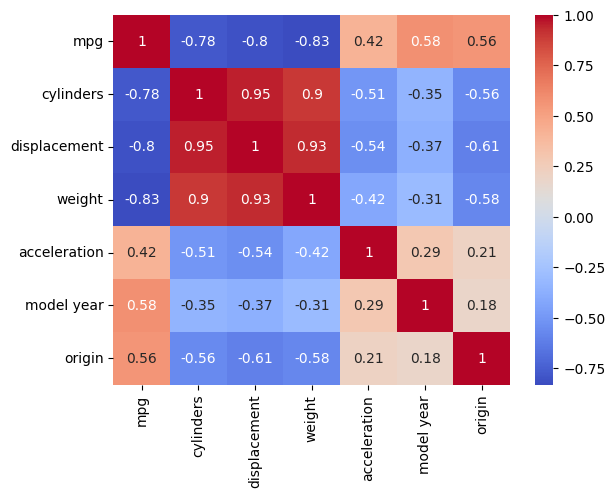

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: xlabel='mpg'>

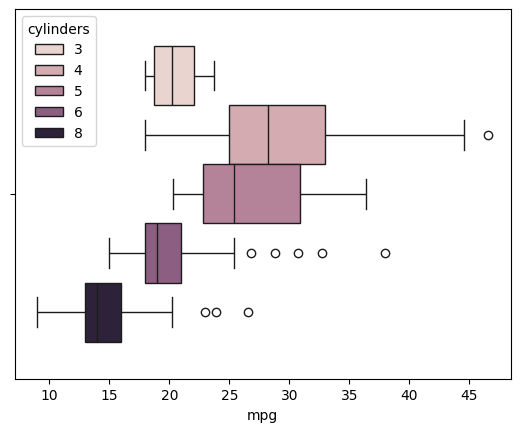

In [6]:
sns.boxplot(df, x="mpg", hue="cylinders")

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
# se for remover com código
df = df.replace("?", pd.NA).dropna()
df["horsepower"] = df["horsepower"].astype(int)

In [9]:
y = df["mpg"]
X = df.drop(columns=["mpg","car name", "origin"])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestRegressor

consumo = RandomForestRegressor()
consumo.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
carro = X_test.sample(1, random_state=42)
carro

,cylinders,displacement,horsepower,weight,acceleration,model year
134,6,258.0,110,3632,18.0,74


In [13]:
consumo.predict(carro)

array([16.864])

In [14]:
y_test.sample(1, random_state=42)

134    16.0
Name: mpg, dtype: float64

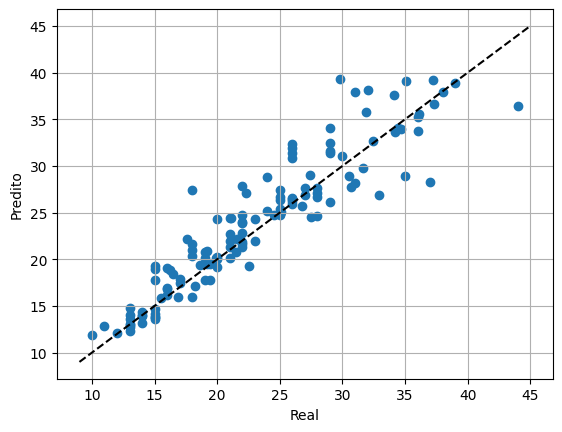

In [15]:
import matplotlib.pyplot as plt

plt.plot([9,45],[9,45],ls="--",c="k")
plt.scatter(y_test, consumo.predict(X_test))
plt.xlabel("Real")
plt.ylabel("Predito")
plt.grid()

# $$\sqrt{(y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots + (y_n - \hat{y}_n)^2}$$

# $$ \sqrt{\sum_{i=1}} $$

In [16]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, consumo.predict(X_test),squared=False)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.889417461916978